In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet


In [2]:
df = pd.read_csv('df_daily.csv')

In [3]:
df.shape

(1442, 8)

In [4]:
df.head()


,date_time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,1433.0,1.092048,0.420415,0.173818,0.816776,1.080732,1.323926,3.314851
Global_reactive_power,1433.0,0.123816,0.034131,0.057811,0.099187,0.119092,0.141454,0.290162
Voltage,1433.0,240.836421,2.045493,231.088229,240.094778,240.965688,241.878583,247.435007
Global_intensity,1433.0,4.629728,1.741352,0.808333,3.503333,4.556111,5.540556,14.028056
Sub_metering_1,1433.0,1.123143,1.113913,0.000000,0.440972,0.775694,1.545139,7.767894
Sub_metering_2,1433.0,1.298620,1.461039,0.000000,0.299306,0.479167,1.897222,8.409028
Sub_metering_3,1433.0,6.444100,2.568978,0.000000,4.638889,6.447222,8.155556,16.488194


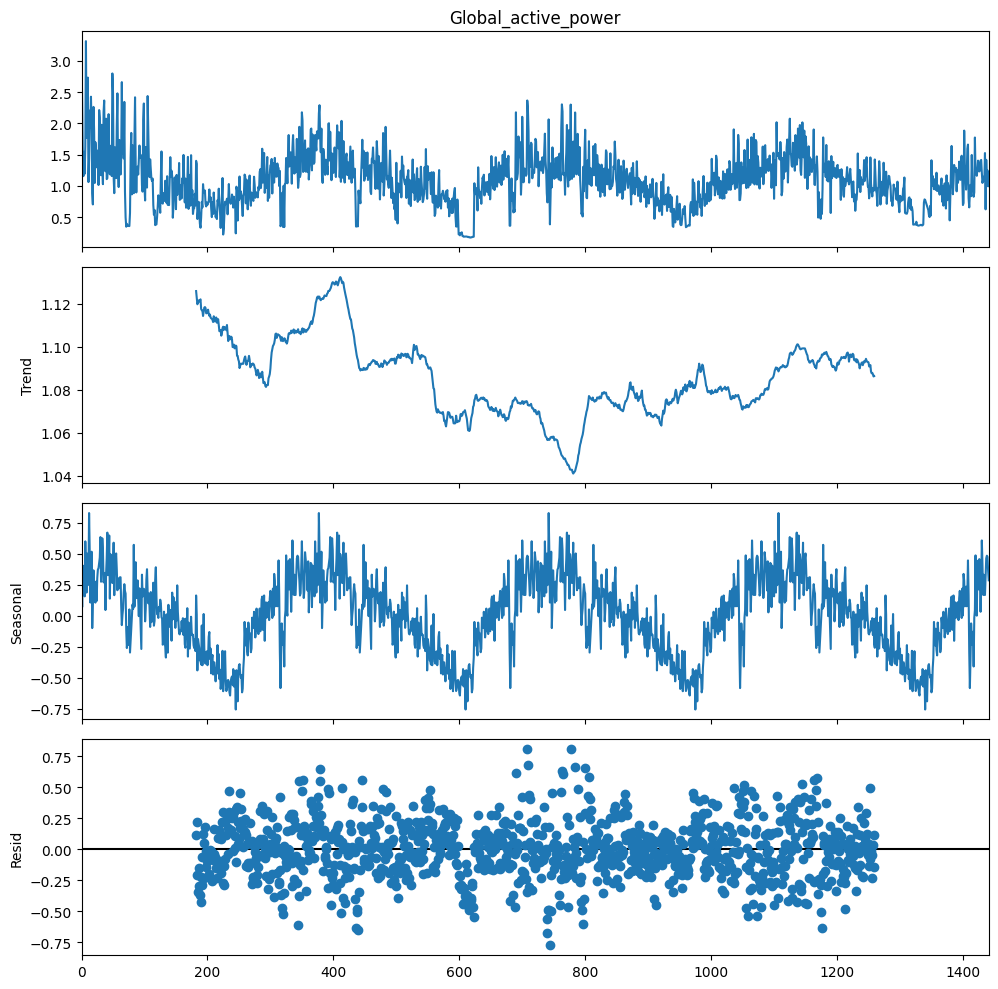

In [6]:
df['Global_active_power'] = df['Global_active_power'].interpolate(method='linear')

decompose_result = seasonal_decompose(df['Global_active_power'], model='additive', period=365)

plt.rcParams.update({'figure.figsize': (10, 10)})
decompose_result.plot()
plt.show()

The Trends section shows Global_active_power trends over time, which indicates a long-term rising or falling pattern.

The Seasonality section shows cyclical fluctuations in Global_active_power, possibly as a result of some seasonal factors or other cyclical events.

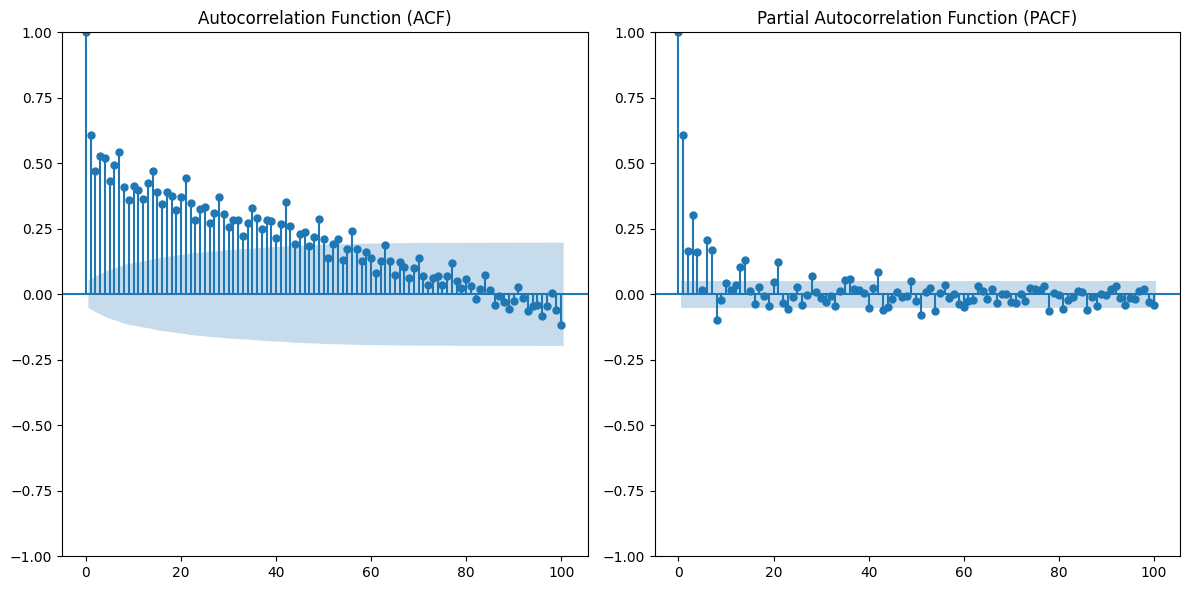

In [7]:
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(121)
plot_acf(df['Global_active_power'], lags=100, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(122)
plot_pacf(df['Global_active_power'], lags=100, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

<Figure size 400x200 with 0 Axes>

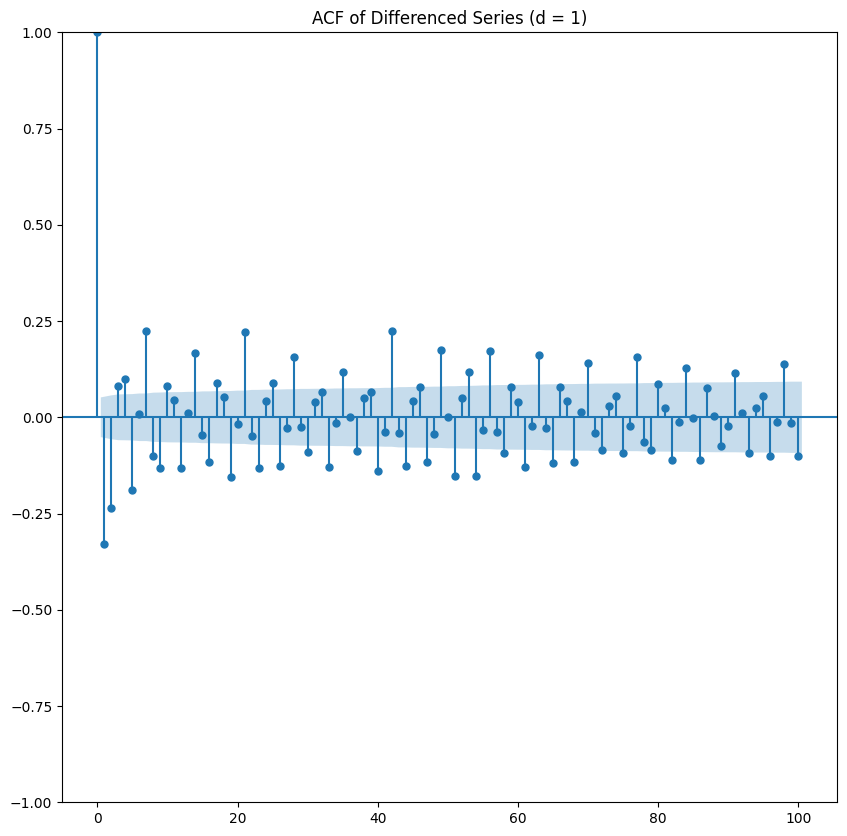

In [8]:
df_diff = df['Global_active_power'].diff().dropna()

# Plot ACF for the differenced series
plt.figure(figsize=(4, 2))
plot_acf(df_diff, lags=100)
plt.title('ACF of Differenced Series (d = 1)')
plt.show()

<Figure size 800x400 with 0 Axes>

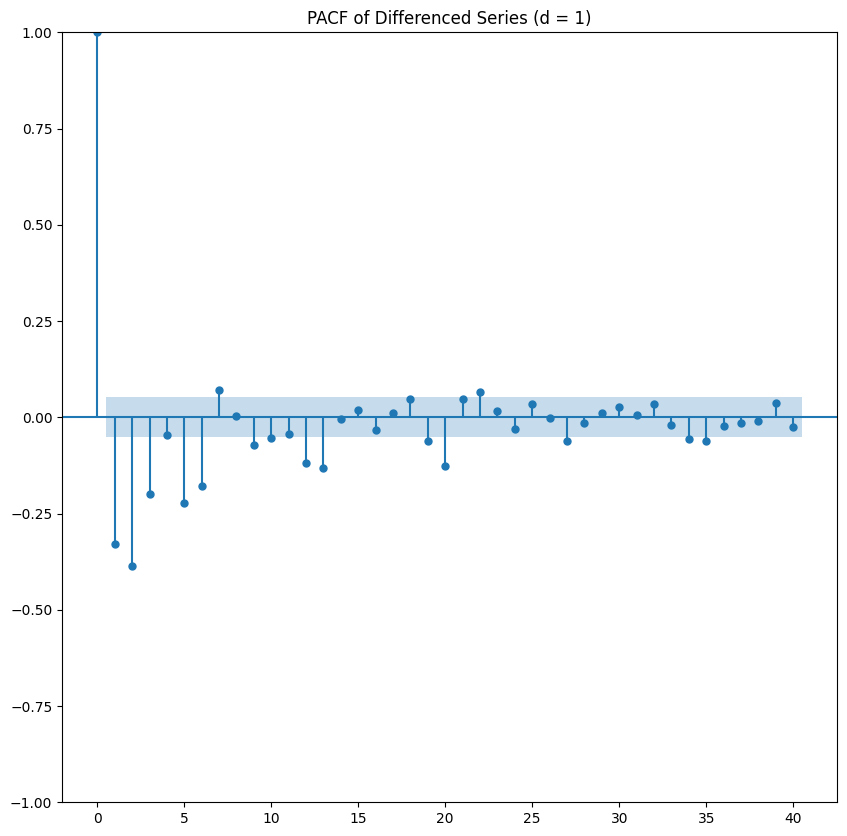

In [9]:
plt.figure(figsize=(8, 4))
plot_pacf(df_diff, lags=40)
plt.title('PACF of Differenced Series (d = 1)')
plt.show()

### Best parameter
d = 1

p = 1

p = 1

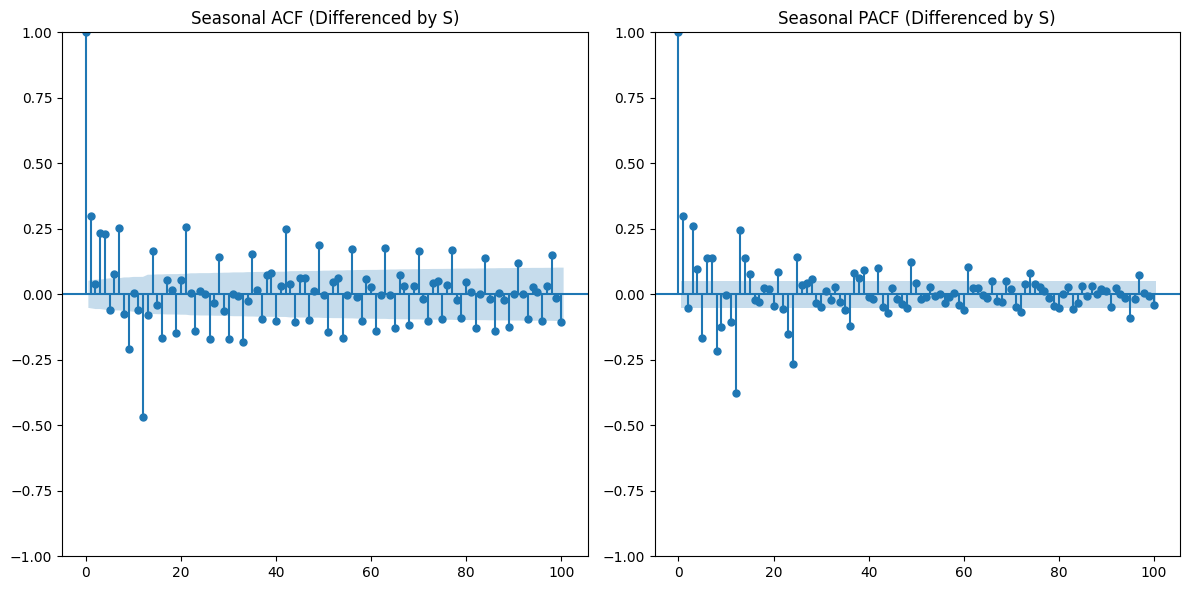

In [10]:
S = 12

df_seasonal_diff = df['Global_active_power'].diff(S).dropna()

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df_seasonal_diff, lags=100, ax=plt.gca())
plt.title('Seasonal ACF (Differenced by S)')

plt.subplot(122)
plot_pacf(df_seasonal_diff, lags=100, ax=plt.gca())
plt.title('Seasonal PACF (Differenced by S)')

plt.tight_layout()
plt.show()

Q = 1 (In ACF chart, the overall trend goes to zero after 10. This decay pattern suggests that the seasonal moving average term (Q) may be 1 because the ACF decays significantly after lag 1.)

P = 1 (PACF decays rapidly after lag 1)

D = 1 The data in the plot looks relatively stationary after differencing once (D=1) (the ACF and PACF plots quickly decay to zero)

S = 365

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56456D-01    |proj g|=  8.97023D-01


 This problem is unconstrained.



At iterate    5    f=  3.48170D-01    |proj g|=  3.72569D-01

At iterate   10    f=  2.54350D-01    |proj g|=  5.47340D-03

At iterate   15    f=  2.50218D-01    |proj g|=  1.73739D-03

At iterate   20    f=  2.50108D-01    |proj g|=  2.30111D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     35      1     0     0   2.910D-05   2.501D-01
  F =  0.25010784547280429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                Global_active_power   No. Observations:               

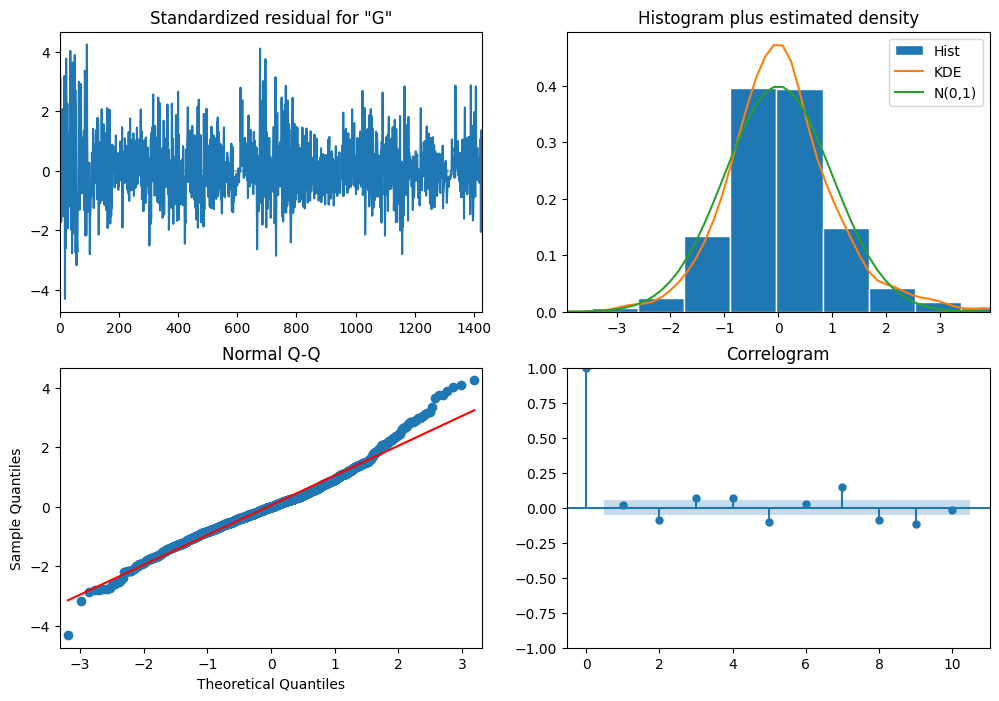

In [11]:
P = 1
D = 1
Q = 1
S = 12
model = SARIMAX(df['Global_active_power'], order=(1, 1, 1), seasonal_order=(P, D, Q, S))

results = model.fit()

print(results.summary())

results.plot_diagnostics(figsize=(12, 8))
plt.show()

In [12]:
pred = results.get_prediction(start=0, end=len(df)-1)
predicted_values = pred.predicted_mean  
actual_values = df['Global_active_power']  

mse = mean_squared_error(actual_values, predicted_values)
mae = mean_absolute_error(actual_values, predicted_values)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.1184408352482825
Mean Absolute Error (MAE): 0.24184884465585382


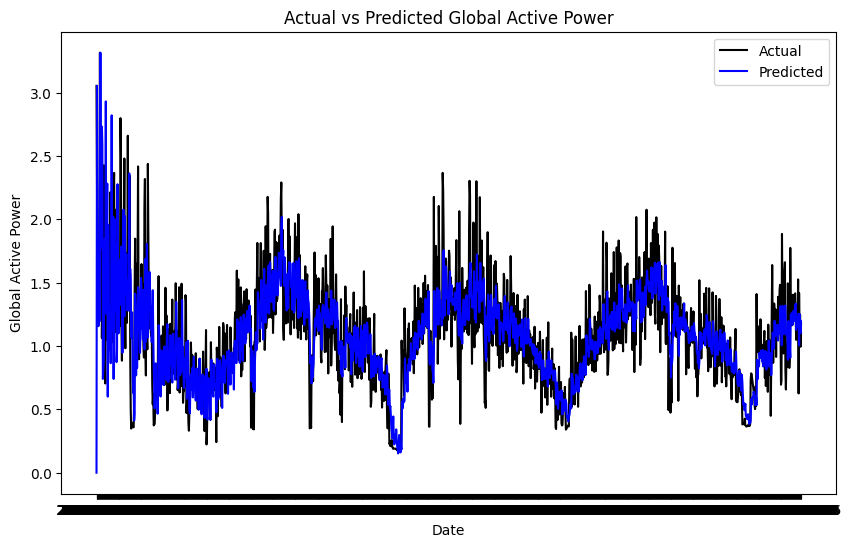

In [13]:
pred = results.get_prediction(start=0, end=len(df)-1)
predicted_values = pred.predicted_mean

df['Predicted'] = predicted_values

plt.figure(figsize=(10, 6))
plt.plot(df['date_time'], df['Global_active_power'], label='Actual', color='black')
plt.plot(df['date_time'], df['Predicted'], label='Predicted', color='blue')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('Actual vs Predicted Global Active Power')
plt.legend()
plt.show()

_____

### Prophet

15:13:00 - cmdstanpy - INFO - Chain [1] start processing
15:13:00 - cmdstanpy - INFO - Chain [1] done processing


Prophet Mean Squared Error (MSE): 0.08610210001315909
Prophet Mean Absolute Error (MAE): 0.2186598527771859


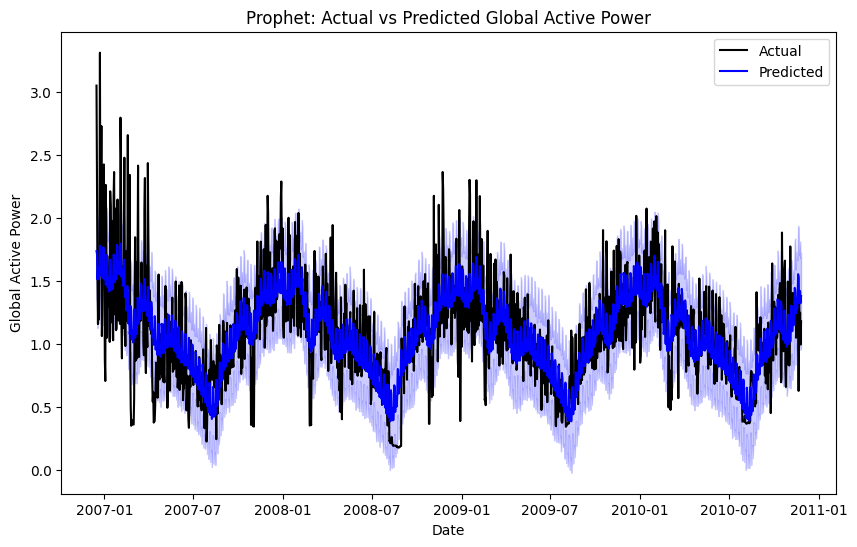

In [14]:
df_prophet = df.rename(columns={'date_time': 'ds', 'Global_active_power': 'y'})

# Convert 'ds' column to datetime format in df_prophet
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Initialize Prophet model
prophet_model = Prophet()

# Fit the Prophet model
prophet_model.fit(df_prophet)

# Predict for the next 12 days
future = prophet_model.make_future_dataframe(periods=12)
forecast = prophet_model.predict(future)

# Convert 'ds' column to datetime format in forecast
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Merge actual and predicted values
actual_vs_pred = pd.merge(df_prophet, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')

# Calculate MSE and MAE
mse_prophet = mean_squared_error(actual_vs_pred['y'], actual_vs_pred['yhat'])
mae_prophet = mean_absolute_error(actual_vs_pred['y'], actual_vs_pred['yhat'])

# Print MSE and MAE values
print(f"Prophet Mean Squared Error (MSE): {mse_prophet}")
print(f"Prophet Mean Absolute Error (MAE): {mae_prophet}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_vs_pred['ds'], actual_vs_pred['y'], label='Actual', color='black')
plt.plot(actual_vs_pred['ds'], actual_vs_pred['yhat'], label='Predicted', color='blue')
plt.fill_between(actual_vs_pred['ds'], actual_vs_pred['yhat_lower'], actual_vs_pred['yhat_upper'], color='blue', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('Prophet: Actual vs Predicted Global Active Power')
plt.legend()
plt.show()



Now we know prophet is a better model.

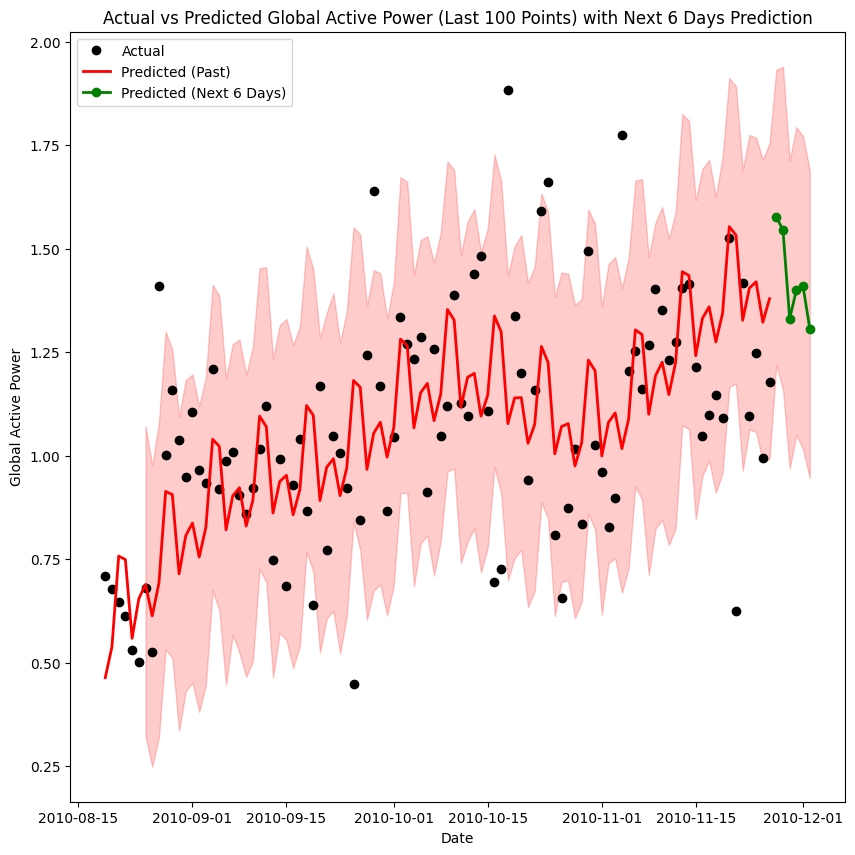

In [15]:
# Prdict the next 6 days with prophet
future = prophet_model.make_future_dataframe(periods=6)

forecast = prophet_model.predict(future)

forecast['ds'] = pd.to_datetime(forecast['ds'])

plt.plot(df_prophet['ds'].tail(100), df_prophet['y'].tail(100), label='Actual', color='black', marker='o', linestyle='None')

# Plot predicted values except the last 6 points in red
plt.plot(forecast['ds'].iloc[:-6].tail(100), forecast['yhat'].iloc[:-6].tail(100), label='Predicted (Past)', color='red', linestyle='-', linewidth=2)

# Plot the last 6 predicted points in green
plt.plot(forecast['ds'].tail(6), forecast['yhat'].tail(6), label='Predicted (Next 6 Days)', color='green', linestyle='-', linewidth=2, marker='o')

# Fill the confidence interval for the entire forecast
plt.fill_between(forecast['ds'].tail(100), forecast['yhat_lower'].tail(100), forecast['yhat_upper'].tail(100), color='red', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('Actual vs Predicted Global Active Power (Last 100 Points) with Next 6 Days Prediction')
plt.legend()
plt.show()